# Vector Spaces
* What is a vector?
    * Vectors are not lists of numbers (necessarily)
* Children have an intuitive idea of what vectors are
* A first definition of a vector
    * Vectors are a quantity with direction and length
    * Examples: 5 meters (length) to your left (direction). 20 miles (length) north (direction)

In [14]:
%matplotlib inline

from matplotlib import pyplot as plt 
import matplotlib as mpl
import numpy as np
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import ConnectionPatch

def create_func_vis(num_funcs=1):
    fig, axs = plt.subplots(1, num_funcs+1)
    for ax in axs:
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal', adjustable='box')
    for i in range(num_funcs):
        con = ConnectionPatch(xyA=(0,0), xyB=(0,0), coordsA="data", coordsB="data", axesA=axs[i], axesB=axs[i+1], arrowstyle="->", alpha=0.5)
        axs[i+1].add_artist(con)
    return fig, axs

def plot_vec(x, y, u, v, ax=plt, **kwargs):
    return ax.quiver(x, y, u, v, angles='xy', units="xy", scale=1, scale_units="xy", **kwargs)

def plot_vec3(x, y, z, u, v, w, **kwargs):
    return plt.quiver(x, y, z, u, v, w, **kwargs)

def plot_vec_at_origin(vecs: np.ndarray, color='black', ax=plt):
    if len(vecs.shape) == 1:
        vecs = vecs.reshape(1, 2)
    o = np.zeros(vecs.shape[0])
    return ax.quiver(o, o, vecs[:, 0], vecs[:, 1], color=color, angles='xy', units="xy", scale=1, scale_units="xy")

def plot_vec3_at_origin(ax, vecs: np.ndarray, color='black'):
    if len(vecs.shape) == 1:
        vecs = vecs.reshape(1, 3)
    o = np.zeros(vecs.shape[0])
    return ax.quiver(o, o, o, vecs[:, 0], vecs[:, 1], vecs[:, 2], color=color)

def rotation(theta):
    c, s = np.cos(np.radians(theta)), np.sin(np.radians(theta))
    return np.array(((c, -s), (s, c)))

def get_vec(angle, length):
    return rotation(angle)@np.array((length,0))

@interact(angle=(0, 360, 10))
def demonstrate_no_coord_grid(angle):
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    rot = rotation(angle)
    vecs = np.array((rot @ np.array([1, 1]), rot @ np.array([0, -1])))
    plot_vec_at_origin(vecs)
    plt.plot(0, 0, 'o', color="black")

interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

* Coordinate grids are extra structure that we will add in shortly. They are not necessarily part of vectors

* Because vectors have a length, they can be scaled up or down by an arbitrary real number
    * Negative scaling corresponds to opposite direction

In [15]:
@interact(len=(-2, 2, 0.1))
def demonstrate_scaling(len):
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    vecs = len * np.array([1, 1])
    plot_vec_at_origin(vecs)
    plt.plot(0, 0, 'o', color="black")

interactive(children=(FloatSlider(value=0.0, description='len', max=2.0, min=-2.0), Output()), _dom_classes=('…

* Vectors can also be added together. 
    * Adding a vector $a$ to a vector $b$ produces a new vector $a+b$ by putting the tail of the second vector at the tip of the first vector
    * This can be done in either order, producing a sort of parallelogram
        * This is called the commutative law
    * Example:

In [16]:
print("Control the angle and size of the red arrow")
@interact(angle=(0, 360, 10), length=(0.1, 2, 0.1))
def demonstrate_vector_addition(angle, length):
    plt.figure()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    rot = rotation(angle)
    vecs = np.array((get_vec(angle, length), [1, 1]))
    plot_vec_at_origin(vecs, color=['red', "blue"])
    plot_vec_at_origin(vecs[0]+vecs[1])
    plot_vec(vecs[:, 0], vecs[:, 1], vecs[::-1, 0], vecs[::-1, 1], color=["blue", 'red'])
    plt.plot(0, 0, 'o', color="black")

Control the angle and size of the red arrow


interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), FloatSlider(value=1.0, desc…

* There are other operations on vectors I won't be covering in detail today
    * Dot product, cross product, tensor product, outer product, clifford product, determinant, etc...


* I claim that anything which has an addition and a scaling operation can be thought of as a vector
    * In other words, given a real number, like $\pi=3.1415\dots$, you must be able to form the vector $\pi v$
    * And you must be able to add $u$ to $v$ to get $u+v$
    * Anything with these two operations we will call a **vector space**

* Some examples:
    * The set of arrows in the 2d plane, without any coordinate grid forms a vector space as we saw above
    * The set of lists of 3 numbers, called $\mathbb{R}^3$ is a vector space
    $$\begin{bmatrix}1 \\2 \\3\end{bmatrix} +\begin{bmatrix}4 \\5 \\6\end{bmatrix} =\begin{bmatrix}5 \\7 \\9\end{bmatrix}$$
    
    * More generally, the set of lists of $n$ numbers is called $\mathbb{R}^n$
    * The set of polynomials in a single variable is a vector space
        $(x^2+2x+3)+(4x^2+5x+6)=5x^2+7x+9$

# Linear Independence, Span, and Bases
* Now that we have a working definition of a vector (an element of some vector space), we can begin to introduce coordinate grids to things in the form of a basis
* In order to define a basis we need to define some other terms first

* Linear combinations
    * A linear combination of a set of vectors is a sum of the vectors, each with a scale factor applied.
    * A linear combination of the vectors $u$ and $v$ is written as $au+by$.
    * An example of a linear combination of vectors in $\mathbb{R}^3$:
    $$3\begin{bmatrix}1 \\0 \\0\end{bmatrix} +2\begin{bmatrix}0 \\1 \\0\end{bmatrix} +5\begin{bmatrix}0\\0\\1\end{bmatrix}=\begin{bmatrix}3 \\2 \\5\end{bmatrix}$$

* Linear independence
    * A set of vectors is **linearly independent** if it contains no redundant vectors
    * In other words, no vector in the set can be written as a linear combination of the others
    * Examples:

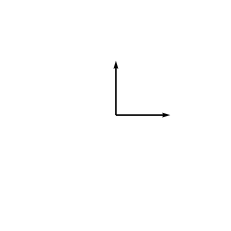

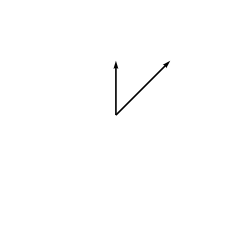

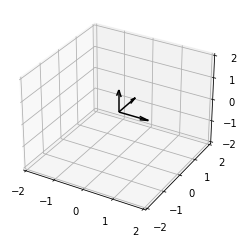

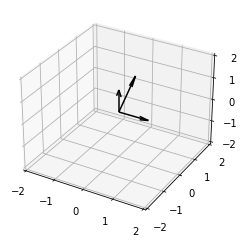

In [17]:
def demonstrate_linear_independence_1():
    plt.figure()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    vecs = np.array(((1,0), (0, 1)))
    plot_vec_at_origin(vecs)
    return plt.gcf()
demonstrate_linear_independence_1()

def demonstrate_linear_independence_2():
    plt.figure()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    vecs = np.array(((1,1), (0, 1)))
    plot_vec_at_origin(vecs)
    return plt.gcf()
demonstrate_linear_independence_2()

def demonstrate_linear_independence_3():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    plot_vec3_at_origin(ax, np.array(((0, 1, 0), (1,0,0), (0, 0, 1))))
    return fig
demonstrate_linear_independence_3();

def demonstrate_linear_independence_4():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    plot_vec3_at_origin(ax, np.array(((0, 1, 1), (1,0,0), (0, 0, 1))))
    return fig
demonstrate_linear_independence_4();

* A set of vectors is linearly dependent if it contains extra, redundant vectors
    * In other words, some vector can be written as a linear combination of the other vectors
    * Examples:

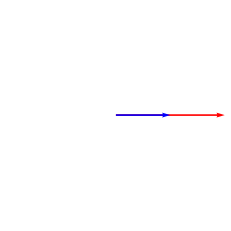

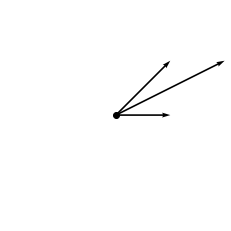

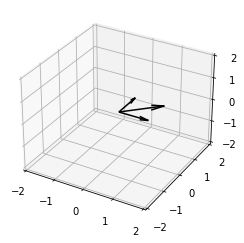

In [18]:
def demonstrate_linear_dependence_1():
    plt.figure()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    vecs = np.array(((2,0), (1,0)))
    plot_vec_at_origin(vecs, color=["red", "blue"])
    return plt.gcf()
demonstrate_linear_dependence_1();

def demonstrate_linear_dependence_2():
    plt.figure()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    vecs = np.array((get_vec(0, 1), [1, 1]))
    plot_vec_at_origin(vecs)
    plot_vec_at_origin(vecs[0]+vecs[1])
    plt.plot(0, 0, 'o', color="black")
demonstrate_linear_dependence_2();

def demonstrate_linear_dependence_3():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    plot_vec3_at_origin(ax, np.array(((1, 1, 0), (1,0,0), (0, 1, 0))))
    return fig
demonstrate_linear_dependence_3();

* Span
    * The next notion we need to define is that of a span of a set of vectors
    * Every vector in the plane can be written as a linear combination of the following two vectors:

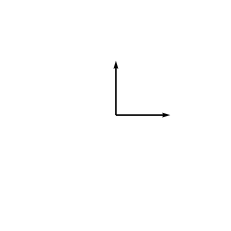

In [19]:
demonstrate_linear_independence_1();

* Next we demonstrate why this happens. 
    * Note how you can stretch the blue and red vectors to reach any vector on the plane:

In [20]:
@interact(l1=(-2, 2, 0.1), l2=(-2, 2, 0.1))
def demonstrate_span(l1, l2):
    plt.figure()
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    vec1 = l1 * np.array((1,0))
    vec2 = l2 * np.array((1,1))
    plot_vec_at_origin(vec1, color='red')
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue")
    plt.plot(0, 0, 'o', color="black")

interactive(children=(FloatSlider(value=0.0, description='l1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

* Given a set of vectors, the set of all linear combinations of those vectors is called the **span** of that set
* Example:
    * The span of the two vectors visualized on the next slide is the entire green plane

In [21]:
@interact(angle=(0, 80, 10))
def demonstrate_span(angle):
    vec1 = np.array((1, 0, 0))
    vec2 = np.array((0, np.cos(np.radians(angle)), np.sin(np.radians(angle))))
    normal = np.cross(vec1, vec2)
    x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1))
    z = (-normal[0] * x - normal[1] * y) * 1. /normal[2]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    # display(np.stack(vec1, vec2))
    plot_vec3_at_origin(ax, np.stack((vec1, vec2)))
    art = ax.plot_surface(x, y, z, color = 'g')
    art.set_alpha(0.5)
    return fig

interactive(children=(IntSlider(value=40, description='angle', max=80, step=10), Output()), _dom_classes=('wid…

* Basis
    * If a set of vectors is linearly independent, then it is said to be the basis for its span
    * We say that a basis is a linearly independent spanning set
    * Examples:
        * The two vectors above are a basis for the green plane
        * Any of the examples of linearly independent sets are also basis for the plane/space

* Rephrasing the definition:
    * A set of vectors is a basis for a vector space if *every vector* can be written *uniquely* as a linear combination of the basis vectors

* A stray definition
    * We won't use this definition today, but the number of vectors in every basis of a vector space is the same
    * This number is called the dimension of the vector space
    * The dimension of the vector space of arrows in the plane is 2, as you would expect
    * The dimension of $\mathbb{R}^n$ is $n$, as you would expect
    * The dimension of the set of all polynomials is infinite
        * Basis: $1, x, x^2, x^3, x^4, x^5, \dots$

* All of this together shows us that there are a lot of different bases for the same vector space
    * Bases are arbitrary, and our vector space of arrows doesn't come with a default choice
    * $\mathbb{R}^3$ does come with a canonical choice of basis though:
        $$\begin{bmatrix}1 \\0 \\0\end{bmatrix},\begin{bmatrix}0 \\1 \\0\end{bmatrix},\begin{bmatrix}0\\0\\1\end{bmatrix}$$

# Linear transformations
- Recall the definition of a function in math:
    - a function $f$ takes a vector $v$ and produces an output vector $f(v)$. The vector it produces is always the same given the same input vector
    - Functions have a **domain** and a **codomain**, representing the vector spaces that the input and output are in.
    - If the input space is $V$ and the output space is $W$ we write this as $f: V \to W$. We read this as "f is a function from V to W".
- A linear transform is a function satisfying an additional property: linearity
    - Preservation of addition: $f(u+v)=f(u)+f(v)$
    - Preservation of scaling: $f(cv)=cf(v)$
- Linearity is sort of like the distributive law and commutative law combined.
- Examples:

In [22]:
@interact(l1=(-2, 2, 0.1), l2=(-2, 2, 0.1))
def demonstrate_linear_transform_1(l1, l2):
    fig, ax = create_func_vis()
    vec1 = l1 * np.array((1,0.5))
    vec2 = l2 * np.array((1,1))
    plot_vec_at_origin(vec1, color='red', ax=ax[0])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[0])
    ax[0].plot(0, 0, 'o', color="black")

    vec1 = 2 * vec1
    vec2 = 2 * vec2

    plot_vec_at_origin(vec1, color='red', ax=ax[1])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[1])
    ax[1].plot(0, 0, 'o', color="black")

@interact(l1=(-2, 2, 0.1), l2=(-2, 2, 0.1))
def demonstrate_linear_transform_2(l1, l2):
    fig, ax = create_func_vis()
    vec1 = l1 * np.array((1,0.5))
    vec2 = l2 * np.array((1,1))
    plot_vec_at_origin(vec1, color='red', ax=ax[0])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[0])
    ax[0].plot(0, 0, 'o', color="black")

    rot = rotation(30)
    vec1 = rot @ vec1
    vec2 = rot @ vec2

    plot_vec_at_origin(vec1, color='red', ax=ax[1])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[1])
    ax[1].plot(0, 0, 'o', color="black")

@interact(l1=(-2, 2, 0.1), l2=(-2, 2, 0.1))
def demonstrate_linear_transform_3(l1, l2):
    fig, ax = create_func_vis()
    vec1 = l1 * np.array((1,0))
    vec2 = l2 * np.array((0,1))
    plot_vec_at_origin(vec1, color='red', ax=ax[0])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[0])
    ax[0].plot(0, 0, 'o', color="black")

    skew = np.array(((1,0), (1,1))).T
    vec1 = skew @ vec1
    vec2 = skew @ vec2

    plot_vec_at_origin(vec1, color='red', ax=ax[1])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[1])
    ax[1].plot(0, 0, 'o', color="black")

@interact(l1=(-2, 2, 0.1), l2=(-2, 2, 0.1))
def demonstrate_linear_transform_4(l1, l2):
    fig, ax = create_func_vis()
    vec1 = l1 * np.array((1,0))
    vec2 = l2 * np.array((0,1))
    plot_vec_at_origin(vec1, color='red', ax=ax[0])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[0])
    ax[0].plot(0, 0, 'o', color="black")

    ref = np.array(((-1,0), (0,1))).T
    vec1 = ref @ vec1
    vec2 = ref @ vec2

    plot_vec_at_origin(vec1, color='red', ax=ax[1])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[1])
    ax[1].plot(0, 0, 'o', color="black")

interactive(children=(FloatSlider(value=0.0, description='l1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

interactive(children=(FloatSlider(value=0.0, description='l1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

interactive(children=(FloatSlider(value=0.0, description='l1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

interactive(children=(FloatSlider(value=0.0, description='l1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

- Freshman's dream
    - A common error by young or inexperience mathematical discipuli is to assume a nonlinear operation is linear. As an example:
    - assuming $(x+y)^n=x^n+y^n$
- Why is linearity important?
    - Lots of reasons: first of all a lot of important functions are linear
        - Rotations
        - Scaling
        - Skewing
        - Reflections
    - Second of all, they are simpler to deal with, as we shall soon see
    - Third, many functions can be approximated by linear functions. Ask if you want further details on this

- Composition of linear functions
    - Given any two functions, $f$ and $g$, you can form the composition of them: $f(g(v))$.
    - This means, first apply the transform $g$, then apply the transform $f$ to the output of it
    - Note that in order for functions to be composable their domains and codomains must match up like $f: V \to W$ and $g: U \to V$
    - The composition of two linear functions is linear:
        $$\begin{align}f(g(au+bv))&=f(g(au)+g(bv))\\&= f(ag(u)+bg(v)) \\&= af(g(u))+bf(g(v))\end{align}$$
    - Examples:

In [23]:
@interact(l1=(-2, 2, 0.1), l2=(-2, 2, 0.1))
def demonstrate_composition(l1, l2):
    fig, ax = create_func_vis(num_funcs=2)
    vec1 = l1 * np.array((1,0))
    vec2 = l2 * np.array((0,1))

    plot_vec_at_origin(vec1, color='red', ax=ax[0])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[0])
    ax[0].plot(0, 0, 'o', color="black")

    rot = rotation(30)
    vec1 = rot @ vec1
    vec2 = rot @ vec2

    plot_vec_at_origin(vec1, color='red', ax=ax[1])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[1])
    ax[1].plot(0, 0, 'o', color="black")

    skew = np.array(((1,0), (1,1))).T
    vec1 = skew @ vec1
    vec2 = skew @ vec2

    plot_vec_at_origin(vec1, color='red', ax=ax[2])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[2])
    ax[2].plot(0, 0, 'o', color="black")

interactive(children=(FloatSlider(value=0.0, description='l1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

- Isomorphism
    - If every vector in the codomain comes from a unique vector in the domain, we call this an isomorphism
    - Equivalently, an isomorphism is an invertible linear transform: 
        - There exists an inverse function $f^{-1}$ such that $f(f^{-1}(v))=v$
    - Example: 
        - The inverse of a 30 deg rotation is a -30 deg rotation

In [24]:
@interact(l1=(-2, 2, 0.1), l2=(-2, 2, 0.1))
def demonstrate_inverse(l1, l2):
    fig, ax = create_func_vis(num_funcs=2)
    vec1 = l1 * np.array((1,0))
    vec2 = l2 * np.array((0,1))

    plot_vec_at_origin(vec1, color='red', ax=ax[0])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[0])
    ax[0].plot(0, 0, 'o', color="black")

    rot = rotation(30)
    vec1 = rot @ vec1
    vec2 = rot @ vec2

    plot_vec_at_origin(vec1, color='red', ax=ax[1])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[1])
    ax[1].plot(0, 0, 'o', color="black")

    rot = rotation(-30)
    vec1 = rot @ vec1
    vec2 = rot @ vec2

    plot_vec_at_origin(vec1, color='red', ax=ax[2])
    plot_vec(vec1[0], vec1[1], vec2[0], vec2[1], color="blue", ax=ax[2])
    ax[2].plot(0, 0, 'o', color="black")

interactive(children=(FloatSlider(value=0.0, description='l1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

- A choice of a basis for a vector space is the same as choosing an isomorphism to $\mathbb{R}^n$ (where $n$ is the dimension).
    - We can think of this function as assigning coordinates to every vector in our domain
    - Example:
        - Assign the vectors $\begin{bmatrix} 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ to the basis below

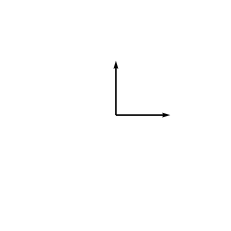

In [25]:
demonstrate_linear_independence_1();

# Matrices
- Matrices are to basis as coordinates are to vector spaces
- Linear transforms are uniquely determined by their value on a basis
    - **Very Important**
    - Proof:
        - Let $x_1, x_2$ be a basis
        - Every vector $v$ can be written as $v=ax_1+bx_2$
            - We know this is possible since $x_1, x_2$ is a basis
        - Now, $f(v)=af(x_1)+bf(x_2)$ 
    - Therefore we can define any linear transform by just listing what the output of the basis vectors should be
        - So, if $f(x_1)=x_3$ and $f(x_2)=x_4$ then we write the linear transform as just $[x_3, x_4]$

- Remember that choosing a basis gives vectors coordinates
- If we choose a basis, we can write the output vectors in that basis
- So, if, in coordinates, $x_3=\begin{bmatrix}2 \\ 3 \end{bmatrix}$ and $x_4=\begin{bmatrix} 1 \\ 2 \end{bmatrix}$
    - then our matrix becomes $\begin{bmatrix} 2 & 1 \\ 3 & 2 \end{bmatrix}$
- If we work soley in $\mathbb{R}^n$ then there is another way to say this:
    - The first column of the matrix is the output of $\begin{bmatrix}1\\0\end{bmatrix}$ under the linear transform
    - The second column of the matrix is the output of $\begin{bmatrix}0\\1\end{bmatrix}$ under the linear transform

- Composition of linear transforms corresponds to matrix multiplication
    - I won't go through all the details, but
    - If you have two linear transforms, both of which have the same domain and codomain, then you may choose a basis and get a matrix for each of them
    - You may compose them, you get another linear transform
        - Hence, the composition has a matrix too
    - If you work through the details of this, it turns out that the matrix of the composition corresponds to the matrix multiplication of the matrices of the two transforms
    - Example:
        - Suppose we want to compose the linear transform whose matrix is $\begin{bmatrix} 2 & 1 \\ 3 & 2 \end{bmatrix}$ with $\begin{bmatrix} 3 & 7 \\ 1 & 1 \end{bmatrix}$
        - Well, we know that $\begin{bmatrix} 1\\0\end{bmatrix}$ goes to $\begin{bmatrix} 2 \\ 3 \end{bmatrix}$
        - And we know that $\begin{bmatrix} 2 \\ 3 \end{bmatrix}$ goes to $2\begin{bmatrix} 3\\1 \end{bmatrix}+3\begin{bmatrix} 7 \\ 1 \end{bmatrix}$
        - Hence the top left entry is $2*3+3*7$
            - But this is the same as what you get when you matrix multiply the above two matrices

- To be continued:
  - Further topics
    - Change of basis formula
    - Gauss-Jordan
    - Inner products, orthonormality
    - Gram-Schimdt
      - Interpolation formula for quaternions
    - The first isomorphism theorem for inner product spaces
    - Eigenvalues
    - Determinants
    - Duality
    - Tensors
  - Further material
    - [Essense of linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) by 3blue1brown
    - Linear algebra done right by Axler
    - http://number-none.com/product/Understanding%20Slerp,%20Then%20Not%20Using%20It/